# Sentiment analysis from scratch

This tutorial is divided into the following parts:
1. Movie Review Dataset
2. Load Text Data
3. Clean Text Data
4. Develop Vocabulary
5. Save Prepared Data

### Movie Review Dataset

The Movie Review Data is a collection of movie reviews retrieved from the imdb.com website in
the early 2000s by Bo Pang and Lillian Lee. The reviews were collected and made available
as part of their research on natural language processing. The reviews were originally released
in 2002, but an updated and cleaned up version was released in 2004, referred to as v2.0. The
dataset is comprised of 1,000 positive and 1,000 negative movie reviews drawn from an archive
of the rec.arts.movies.reviews newsgroup hosted at IMDB. The authors refer to this dataset as
the `polarity dataset`.

Our data contains 1000 positive and 1000 negative reviews all written before 2002,
with a cap of 20 reviews per author (312 authors total) per category. We refer to
this corpus as the polarity dataset.

The data has been cleaned up somewhat, for example:
+ The dataset is comprised of only English reviews.
+ All text has been converted to lowercase.
+ There is white space around punctuation like periods, commas, and brackets.
+ Text has been split into one sentence per line.

Movie Review Polarity Dataset (review polarity.tar.gz, 3MB).
http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz


### Load Text Data

In [10]:
# load one file
path = r'C:\Users\Prashant\Desktop\review_polarity.tar\review_polarity'

filename = path + '/txt_sentoken/neg/cv000_29416.txt'

# open the file as read only
file = open(filename, 'r')

# read all text
text = file.read()

# close the file
file.close()

In [11]:
text

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [12]:
path

'C:\\Users\\Prashant\\Desktop\\review_polarity.tar\\review_polarity'

In [15]:
# load doc into memory
def load_doc(filename):
    
    # open the file as read only
    file = open(filename, 'r')
    
    # read all text
    text = file.read()
    
    # close the file
    file.close()
    
    return text

In [16]:
path

'C:\\Users\\Prashant\\Desktop\\review_polarity.tar\\review_polarity'

In [24]:
from os import listdir

# specify directory to load
# directory = 'txt_sentoken/neg'
path = r'C:\Users\Prashant\Desktop\review_polarity.tar\review_polarity'
directory = path + '/txt_sentoken/neg'

# walk through all files in the folder
for filename in listdir(directory):
    
    # skip files that do not have the right extension
    if not filename.endswith(".txt"):
        next
    
    # create the full path of the file to open
    path = directory + '/' + filename
    
    # load document
    doc = load_doc(path)
    
    print('Loaded %s' % filename)

Loaded cv000_29416.txt
Loaded cv001_19502.txt
Loaded cv002_17424.txt
Loaded cv003_12683.txt
Loaded cv004_12641.txt
Loaded cv005_29357.txt
Loaded cv006_17022.txt
Loaded cv007_4992.txt
Loaded cv008_29326.txt
Loaded cv009_29417.txt
Loaded cv010_29063.txt
Loaded cv011_13044.txt
Loaded cv012_29411.txt
Loaded cv013_10494.txt
Loaded cv014_15600.txt
Loaded cv015_29356.txt
Loaded cv016_4348.txt
Loaded cv017_23487.txt
Loaded cv018_21672.txt
Loaded cv019_16117.txt
Loaded cv020_9234.txt
Loaded cv021_17313.txt
Loaded cv022_14227.txt
Loaded cv023_13847.txt
Loaded cv024_7033.txt
Loaded cv025_29825.txt
Loaded cv026_29229.txt
Loaded cv027_26270.txt
Loaded cv028_26964.txt
Loaded cv029_19943.txt
Loaded cv030_22893.txt
Loaded cv031_19540.txt
Loaded cv032_23718.txt
Loaded cv033_25680.txt
Loaded cv034_29446.txt
Loaded cv035_3343.txt
Loaded cv036_18385.txt
Loaded cv037_19798.txt
Loaded cv038_9781.txt
Loaded cv039_5963.txt
Loaded cv040_8829.txt
Loaded cv041_22364.txt
Loaded cv042_11927.txt
Loaded cv043_16808.

Loaded cv457_19546.txt
Loaded cv458_9000.txt
Loaded cv459_21834.txt
Loaded cv460_11723.txt
Loaded cv461_21124.txt
Loaded cv462_20788.txt
Loaded cv463_10846.txt
Loaded cv464_17076.txt
Loaded cv465_23401.txt
Loaded cv466_20092.txt
Loaded cv467_26610.txt
Loaded cv468_16844.txt
Loaded cv469_21998.txt
Loaded cv470_17444.txt
Loaded cv471_18405.txt
Loaded cv472_29140.txt
Loaded cv473_7869.txt
Loaded cv474_10682.txt
Loaded cv475_22978.txt
Loaded cv476_18402.txt
Loaded cv477_23530.txt
Loaded cv478_15921.txt
Loaded cv479_5450.txt
Loaded cv480_21195.txt
Loaded cv481_7930.txt
Loaded cv482_11233.txt
Loaded cv483_18103.txt
Loaded cv484_26169.txt
Loaded cv485_26879.txt
Loaded cv486_9788.txt
Loaded cv487_11058.txt
Loaded cv488_21453.txt
Loaded cv489_19046.txt
Loaded cv490_18986.txt
Loaded cv491_12992.txt
Loaded cv492_19370.txt
Loaded cv493_14135.txt
Loaded cv494_18689.txt
Loaded cv495_16121.txt
Loaded cv496_11185.txt
Loaded cv497_27086.txt
Loaded cv498_9288.txt
Loaded cv499_11407.txt
Loaded cv500_1072

Loaded cv861_12809.txt
Loaded cv862_15924.txt
Loaded cv863_7912.txt
Loaded cv864_3087.txt
Loaded cv865_28796.txt
Loaded cv866_29447.txt
Loaded cv867_18362.txt
Loaded cv868_12799.txt
Loaded cv869_24782.txt
Loaded cv870_18090.txt
Loaded cv871_25971.txt
Loaded cv872_13710.txt
Loaded cv873_19937.txt
Loaded cv874_12182.txt
Loaded cv875_5622.txt
Loaded cv876_9633.txt
Loaded cv877_29132.txt
Loaded cv878_17204.txt
Loaded cv879_16585.txt
Loaded cv880_29629.txt
Loaded cv881_14767.txt
Loaded cv882_10042.txt
Loaded cv883_27621.txt
Loaded cv884_15230.txt
Loaded cv885_13390.txt
Loaded cv886_19210.txt
Loaded cv887_5306.txt
Loaded cv888_25678.txt
Loaded cv889_22670.txt
Loaded cv890_3515.txt
Loaded cv891_6035.txt
Loaded cv892_18788.txt
Loaded cv893_26731.txt
Loaded cv894_22140.txt
Loaded cv895_22200.txt
Loaded cv896_17819.txt
Loaded cv897_11703.txt
Loaded cv898_1576.txt
Loaded cv899_17812.txt
Loaded cv900_10800.txt
Loaded cv901_11934.txt
Loaded cv902_13217.txt
Loaded cv903_18981.txt
Loaded cv904_25663.

In [25]:
# load all docs in a directory
def process_docs(directory):
    
#     print(directory)
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        # create the full path of the file to open
        path = directory + '/' + filename
        # load document
        doc = load_doc(path)
        print('Loaded %s' % filename)

# specify directory to load
path = r'C:\Users\Prashant\Desktop\review_polarity.tar\review_polarity'
directory = path + '/txt_sentoken/neg'
process_docs(directory)

C:\Users\Prashant\Desktop\review_polarity.tar\review_polarity/txt_sentoken/neg
Loaded cv000_29416.txt
Loaded cv001_19502.txt
Loaded cv002_17424.txt
Loaded cv003_12683.txt
Loaded cv004_12641.txt
Loaded cv005_29357.txt
Loaded cv006_17022.txt
Loaded cv007_4992.txt
Loaded cv008_29326.txt
Loaded cv009_29417.txt
Loaded cv010_29063.txt
Loaded cv011_13044.txt
Loaded cv012_29411.txt
Loaded cv013_10494.txt
Loaded cv014_15600.txt
Loaded cv015_29356.txt
Loaded cv016_4348.txt
Loaded cv017_23487.txt
Loaded cv018_21672.txt
Loaded cv019_16117.txt
Loaded cv020_9234.txt
Loaded cv021_17313.txt
Loaded cv022_14227.txt
Loaded cv023_13847.txt
Loaded cv024_7033.txt
Loaded cv025_29825.txt
Loaded cv026_29229.txt
Loaded cv027_26270.txt
Loaded cv028_26964.txt
Loaded cv029_19943.txt
Loaded cv030_22893.txt
Loaded cv031_19540.txt
Loaded cv032_23718.txt
Loaded cv033_25680.txt
Loaded cv034_29446.txt
Loaded cv035_3343.txt
Loaded cv036_18385.txt
Loaded cv037_19798.txt
Loaded cv038_9781.txt
Loaded cv039_5963.txt
Loaded c

Loaded cv479_5450.txt
Loaded cv480_21195.txt
Loaded cv481_7930.txt
Loaded cv482_11233.txt
Loaded cv483_18103.txt
Loaded cv484_26169.txt
Loaded cv485_26879.txt
Loaded cv486_9788.txt
Loaded cv487_11058.txt
Loaded cv488_21453.txt
Loaded cv489_19046.txt
Loaded cv490_18986.txt
Loaded cv491_12992.txt
Loaded cv492_19370.txt
Loaded cv493_14135.txt
Loaded cv494_18689.txt
Loaded cv495_16121.txt
Loaded cv496_11185.txt
Loaded cv497_27086.txt
Loaded cv498_9288.txt
Loaded cv499_11407.txt
Loaded cv500_10722.txt
Loaded cv501_12675.txt
Loaded cv502_10970.txt
Loaded cv503_11196.txt
Loaded cv504_29120.txt
Loaded cv505_12926.txt
Loaded cv506_17521.txt
Loaded cv507_9509.txt
Loaded cv508_17742.txt
Loaded cv509_17354.txt
Loaded cv510_24758.txt
Loaded cv511_10360.txt
Loaded cv512_17618.txt
Loaded cv513_7236.txt
Loaded cv514_12173.txt
Loaded cv515_18484.txt
Loaded cv516_12117.txt
Loaded cv517_20616.txt
Loaded cv518_14798.txt
Loaded cv519_16239.txt
Loaded cv520_13297.txt
Loaded cv521_1730.txt
Loaded cv522_5418.

Loaded cv949_21565.txt
Loaded cv950_13478.txt
Loaded cv951_11816.txt
Loaded cv952_26375.txt
Loaded cv953_7078.txt
Loaded cv954_19932.txt
Loaded cv955_26154.txt
Loaded cv956_12547.txt
Loaded cv957_9059.txt
Loaded cv958_13020.txt
Loaded cv959_16218.txt
Loaded cv960_28877.txt
Loaded cv961_5578.txt
Loaded cv962_9813.txt
Loaded cv963_7208.txt
Loaded cv964_5794.txt
Loaded cv965_26688.txt
Loaded cv966_28671.txt
Loaded cv967_5626.txt
Loaded cv968_25413.txt
Loaded cv969_14760.txt
Loaded cv970_19532.txt
Loaded cv971_11790.txt
Loaded cv972_26837.txt
Loaded cv973_10171.txt
Loaded cv974_24303.txt
Loaded cv975_11920.txt
Loaded cv976_10724.txt
Loaded cv977_4776.txt
Loaded cv978_22192.txt
Loaded cv979_2029.txt
Loaded cv980_11851.txt
Loaded cv981_16679.txt
Loaded cv982_22209.txt
Loaded cv983_24219.txt
Loaded cv984_14006.txt
Loaded cv985_5964.txt
Loaded cv986_15092.txt
Loaded cv987_7394.txt
Loaded cv988_20168.txt
Loaded cv989_17297.txt
Loaded cv990_12443.txt
Loaded cv991_19973.txt
Loaded cv992_12806.txt

## Clean Text Data

In [26]:
# load the document
path = r'C:\Users\Prashant\Desktop\review_polarity.tar\review_polarity'

filename = path + '/txt_sentoken/neg/cv000_29416.txt'
text = load_doc(filename)

# split into tokens by white space
tokens = text.split()
print(tokens)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', "what's", 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind-fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'bad', 'ways', 'of'

Just looking at the raw tokens can give us a lot of ideas of things to try, such as:
+ Remove punctuation from words (e.g. ‘what’s’).
+ Removing tokens that are just punctuation (e.g. ‘-’).
+ Removing tokens that contain numbers (e.g. ‘10/10’).
+ Remove tokens that have one character (e.g. ‘a’).
+ Remove tokens that don’t have much meaning (e.g. ‘and’).

Some ideas:
+ We can filter out punctuation from tokens using regular expressions.
+ We can remove tokens that are just punctuation or contain numbers by using an isalpha()
check on each token.
+ We can remove English stop words using the list loaded using NLTK.
+ We can filter out short tokens by checking their length.

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
from nltk.corpus import stopwords
import string
import re

# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))

# remove punctuation from each word
tokens = [re_punc.sub('', w) for w in tokens]

# remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]

# filter out stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

# filter out short tokens
tokens = [word for word in tokens if len(word) > 1]
print(tokens)

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'didnt', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'whats', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scen

In [29]:
# turn a doc into clean tokens
def clean_doc(doc):
    
    # split into tokens by white space
    tokens = doc.split()
    
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

In [31]:
# load the document
path = r'C:\Users\Prashant\Desktop\review_polarity.tar\review_polarity'

# filename = path + '/txt_sentoken/neg/cv000_29416.txt'

filename = path + '/txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anythi

## Develop Vocabulary

We can keep track of the vocabulary in a `Counter`, which is a dictionary of words and their
count with some additional convenience functions. We need to develop a new function to process
a document and add it to the vocabulary. 

The function needs to load a document by calling the previously developed `load doc()` function. It needs to clean the loaded document using the previously developed `clean doc()` function, then it needs to add all the tokens to the `Counter`, and update counts. 

We can do this last step by calling the `update()` function on the counter object. Below is a function called `add doc to vocab()` that takes as arguments a document filename and a `Counter` vocabulary.

In [32]:
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    
    # clean doc
    tokens = clean_doc(doc)
    
    # update counts
    vocab.update(tokens)

In [33]:
# load all docs in a directory
def process_docs(directory, vocab):
    
    # walk through all files in the folder
    for filename in listdir(directory):
    
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next

        # create the full path of the file to open
        path = directory + '/' + filename

        # add doc to vocab
        add_doc_to_vocab(path, vocab)

https://www.tutorialspoint.com/python/file_next.htm

In [35]:
from collections import Counter

# define vocab
vocab = Counter()

# add all docs to vocab
process_docs(path + '/txt_sentoken/neg', vocab)
process_docs(path + '/txt_sentoken/pos', vocab)

# print the size of the vocab
print(len(vocab))

46557


Running the example creates a vocabulary with all documents in the dataset, including
positive and negative reviews. We can see that there are a little over 46,000 unique words across
all reviews and the top 3 words are *film, one, and movie.*

In [36]:
type(vocab)

collections.Counter

In [37]:
vocab.most_common(10)

[('film', 8860),
 ('one', 5521),
 ('movie', 5440),
 ('like', 3553),
 ('even', 2555),
 ('good', 2320),
 ('time', 2283),
 ('story', 2118),
 ('films', 2102),
 ('would', 2042)]

In [16]:
vocab.most_common()[:-20:-1]


[('capitalized', 1),
 ('keyboardist', 1),
 ('powaqqatsi', 1),
 ('timbre', 1),
 ('tangerine', 1),
 ('obscuring', 1),
 ('obstructions', 1),
 ('snoots', 1),
 ('cageworld', 1),
 ('allseeing', 1),
 ('vainly', 1),
 ('paneled', 1),
 ('overflying', 1),
 ('trueman', 1),
 ('downgrade', 1),
 ('chiefofstafff', 1),
 ('countrysides', 1),
 ('discharge', 1),
 ('grittiest', 1)]

In [17]:
# print the top words in the vocab
print(vocab.most_common(50))

[('film', 8860), ('one', 5521), ('movie', 5440), ('like', 3553), ('even', 2555), ('good', 2320), ('time', 2283), ('story', 2118), ('films', 2102), ('would', 2042), ('much', 2024), ('also', 1965), ('characters', 1947), ('get', 1921), ('character', 1906), ('two', 1825), ('first', 1768), ('see', 1730), ('well', 1694), ('way', 1668), ('make', 1590), ('really', 1563), ('little', 1491), ('life', 1472), ('plot', 1451), ('people', 1420), ('movies', 1416), ('could', 1395), ('bad', 1374), ('scene', 1373), ('never', 1364), ('best', 1301), ('new', 1277), ('many', 1268), ('doesnt', 1267), ('man', 1266), ('scenes', 1265), ('dont', 1210), ('know', 1207), ('hes', 1150), ('great', 1141), ('another', 1111), ('love', 1089), ('action', 1078), ('go', 1075), ('us', 1065), ('director', 1056), ('something', 1048), ('end', 1047), ('still', 1038)]


In [45]:
common_words = ['film', 'movie', 'films', 'would']
for word in common_words:
    vocab.pop(word)

vocab.most_common(10)

[('one', 5521),
 ('like', 3553),
 ('even', 2555),
 ('good', 2320),
 ('time', 2283),
 ('story', 2118),
 ('much', 2024),
 ('also', 1965),
 ('characters', 1947),
 ('get', 1921)]

Perhaps the least common words, those that only appear once across all reviews, are not
predictive. Perhaps some of the most common words are not useful too. 

In [47]:
# keep tokens with > 5 occurrence
min_occurane = 5
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

14799


This reduces the vocabulary from 46,557 to 14,799 words, a huge drop. Perhaps a minimum
of 5 occurrences is too aggressive; you can experiment with different values. We can then save
the chosen vocabulary of words to a new file.

In [48]:
# save list to file
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [49]:
# save tokens to a vocabulary file
save_list(tokens, 'vocab1.txt')

### Save Prepared Data

In [51]:
# load vocabulary
vocab_filename = 'vocab1.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [22]:
vocab

{'visions',
 'clientele',
 'desolate',
 'adjani',
 'identifying',
 'chlo',
 'poor',
 'novels',
 'driven',
 'mounting',
 'rhett',
 'dictator',
 'ichabod',
 'thrash',
 'grooving',
 'dykstra',
 'geiger',
 'seedy',
 'boasting',
 'sarone',
 'conservative',
 'howled',
 'valuable',
 'hanson',
 'welshman',
 'riches',
 'funniest',
 'bonts',
 'theology',
 'atkins',
 'greta',
 'fixture',
 'touchyfeely',
 'supersecret',
 'filmy',
 'rearrange',
 'ravel',
 'stimulating',
 'ol',
 'hargrove',
 'machine',
 'gambling',
 'stoops',
 'dish',
 'showmanship',
 'recess',
 'premise',
 'shale',
 'passes',
 'shoulders',
 'figuratively',
 'green',
 'raiders',
 'collette',
 'eastwood',
 'marisol',
 'miami',
 'doren',
 'alternates',
 'bernstein',
 'medium',
 'reggae',
 'overheard',
 'moxxons',
 'rolls',
 'unemotional',
 'tired',
 'halves',
 'towards',
 'portrays',
 'brenner',
 'patrasche',
 'suspending',
 'pied',
 'glassy',
 'revisited',
 'destitute',
 'bowling',
 'eyes',
 'greatly',
 'sensitive',
 'algar',
 'lurki

Next, we can clean the reviews, use the loaded vocab to filter out unwanted tokens, and
save the clean reviews in a new file. One approach could be to save all the positive reviews
in one file and all the negative reviews in another file, with the filtered tokens separated by
white space for each review on separate lines. 

In [23]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    
    # clean doc
    tokens = clean_doc(doc)
    
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    
    return ' '.join(tokens)

In [24]:
# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    
    # walk through all files in the folder
    for filename in listdir(directory):
        
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        
        # create the full path of the file to open
        path = directory + '/' + filename
        
        # load and clean the doc
        line = doc_to_line(path, vocab)
        
        # add to list
        lines.append(line)
    return lines

In [25]:
# load vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

# prepare negative reviews
negative_lines = process_docs('txt_sentoken/neg', vocab)
save_list(negative_lines, 'negative.txt')

# prepare positive reviews
positive_lines = process_docs('txt_sentoken/pos', vocab)
save_list(positive_lines, 'positive.txt')

Running the example saves two new files, `negative.txt` and `positive.txt`, that contain the
prepared negative and positive reviews respectively. The data is ready for use in a bag-of-words
or even word embedding model.

## Pulling all of this together

In [55]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# prepare regex for char filtering
	re_punc = re.compile('[%s]' % re.escape(string.punctuation))
	# remove punctuation from each word
	tokens = [re_punc.sub('', w) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_train):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_train and filename.startswith('cv9'):
			continue
		if not is_train and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
	# load documents
# 	neg = process_docs('txt_sentoken/neg', vocab, is_train)
# 	pos = process_docs('txt_sentoken/pos', vocab, is_train)
    neg = process_docs(path + '/txt_sentoken/neg', vocab, is_train)
    pos = process_docs(path + '/txt_sentoken/pos', vocab, is_train)
    
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

In [56]:
# load the vocabulary
vocab_filename = 'vocab1.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)

# create the tokenizer
tokenizer = create_tokenizer(train_docs)

In [61]:
len(train_docs)

1800

In [62]:
train_docs[0]

'plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch sorta find critique teen generation touches cool idea presents bad package makes review even harder one write since generally applaud attempt break mold mess head lost highway memento good bad ways making types folks didnt one correctly seem taken pretty neat concept executed terribly problems well main problem simply jumbled starts normal fantasy world audience member idea whats going dreams characters coming back dead others look like dead strange apparitions chase scenes tons weird things happen simply explained personally dont mind trying unravel every give clue get kind fed biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like actually figured halfway point strangeness start make little bit sense still didnt make en

In [63]:
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')
print(Xtrain.shape, Xtest.shape)

(1800, 14777) (200, 14777)


In [52]:
Xtrain[0]

array([0.        , 0.01572327, 0.00943396, ..., 0.        , 0.        ,
       0.        ])

In [106]:
n_words

14777

In [109]:
ytrain.shape 

(1800,)

## Standard ANN model

In [107]:
# define network
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))  # this is my 1st hidden layer
model.add(Dense(2, activation='softmax'))  # this is my OUTPUT layer

# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# summarize defined model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 8         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [151]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
import pydot

# This user-defined function return a Deep Learning Modle
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(32, input_shape=(n_words,), activation='relu', kernel_regularizer='l2'))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], )
    
    # summarize defined model
    model.summary()    
#     plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [152]:
# evaluate a neural network model
def evaluate_model(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 5
    n_words = Xtest.shape[1]
    
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)
        
        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [153]:
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='binary')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='binary')

In [154]:
import numpy as np
ytrain = np.array(ytrain)
Xtrain.shape, ytrain.shape

((1800, 14777), (1800,))

In [155]:
# define network
n_words = Xtrain.shape[1]
model = define_model(n_words)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                472896    
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 473,985
Trainable params: 473,985
Non-trainable params: 0
_________________________________________________________________


In [147]:
# 14777 >> no. of input nodes
# 14777*16 + 16

16*1 + 1

17

In [159]:
# fit network
h = model.fit(Xtrain, ytrain, validation_split=0.2, batch_size=180, epochs=20, verbose=2)

Epoch 1/20
8/8 - 0s - loss: 0.3076 - accuracy: 1.0000 - val_loss: 0.6469 - val_accuracy: 0.8222
Epoch 2/20
8/8 - 0s - loss: 0.2926 - accuracy: 1.0000 - val_loss: 0.7214 - val_accuracy: 0.7806
Epoch 3/20
8/8 - 0s - loss: 0.2780 - accuracy: 1.0000 - val_loss: 0.7983 - val_accuracy: 0.7444
Epoch 4/20
8/8 - 0s - loss: 0.2644 - accuracy: 1.0000 - val_loss: 0.8446 - val_accuracy: 0.7194
Epoch 5/20
8/8 - 0s - loss: 0.2522 - accuracy: 1.0000 - val_loss: 0.8077 - val_accuracy: 0.7222
Epoch 6/20
8/8 - 0s - loss: 0.2421 - accuracy: 1.0000 - val_loss: 0.7173 - val_accuracy: 0.7778
Epoch 7/20
8/8 - 0s - loss: 0.2325 - accuracy: 1.0000 - val_loss: 0.6405 - val_accuracy: 0.8083
Epoch 8/20
8/8 - 0s - loss: 0.2243 - accuracy: 1.0000 - val_loss: 0.6312 - val_accuracy: 0.8111
Epoch 9/20
8/8 - 0s - loss: 0.2160 - accuracy: 1.0000 - val_loss: 0.6207 - val_accuracy: 0.8083
Epoch 10/20
8/8 - 0s - loss: 0.2081 - accuracy: 1.0000 - val_loss: 0.5998 - val_accuracy: 0.8278
Epoch 11/20
8/8 - 0s - loss: 0.2014 - a

In [129]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Loss Fn valaues')

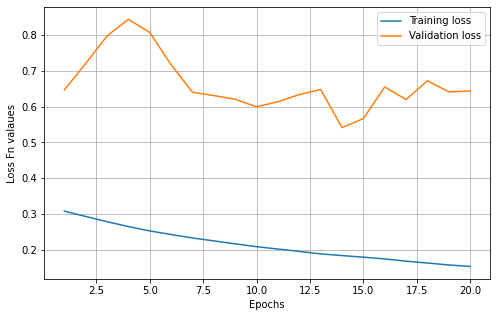

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,21)), h.history['loss'], label='Training loss')
plt.plot(list(range(1,21)), h.history['val_loss'], label='Validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss Fn valaues')

Text(0, 0.5, 'Loss Fn valaues')

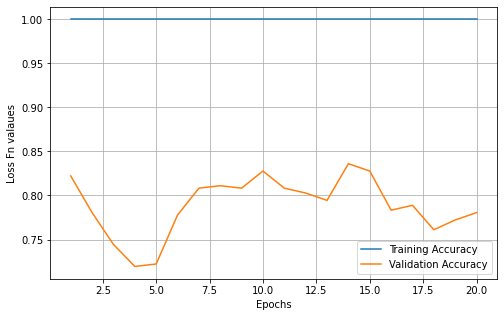

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,21)), h.history['accuracy'], label='Training Accuracy')
plt.plot(list(range(1,21)), h.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss Fn valaues')

In [166]:
ytest = np.array(ytest)

In [168]:
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))


Test Accuracy: 86.000001


## Lets try other modes of Bag of Words model

In [50]:
# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    
    # create the tokenizer
    tokenizer = Tokenizer()
    
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    
    return Xtrain, Xtest

In [51]:
import pandas as pd
# load the vocabulary
vocab_filename = 'vocab1.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)

# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = pd.DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_model(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                739100    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 739,151
Trainable params: 739,151
Non-trainable params: 0
_________________________________________________________________
1 accuracy: 0.9350000023841858
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                739100    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 739,151
Trainable params: 739,151
Non-trainable params: 0
_______________________________________________________

3 accuracy: 0.8999999761581421
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                739100    
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 51        
Total params: 739,151
Trainable params: 739,151
Non-trainable params: 0
_________________________________________________________________
4 accuracy: 0.8949999809265137
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 50)                739100    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 51        
Total params: 739,151
Trainable params: 739,151
Non-trainable params: 0
______________________

6 accuracy: 0.8700000047683716
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 50)                739100    
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 51        
Total params: 739,151
Trainable params: 739,151
Non-trainable params: 0
_________________________________________________________________
7 accuracy: 0.8849999904632568
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 50)                739100    
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 51        
Total params: 739,151
Trainable params: 739,151
Non-trainable params: 0
______________________

9 accuracy: 0.8700000047683716
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 50)                739100    
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 51        
Total params: 739,151
Trainable params: 739,151
Non-trainable params: 0
_________________________________________________________________
10 accuracy: 0.875
          binary      count      tfidf       freq
count  10.000000  10.000000  10.000000  10.000000
mean    0.928000   0.896500   0.879000   0.871500
std     0.008882   0.009443   0.008433   0.005297
min     0.915000   0.885000   0.870000   0.860000
25%     0.920000   0.890000   0.871250   0.870000
50%     0.930000   0.895000   0.877500   0.870000
75%     0.935000   0.903750   0.885000   0.875000
max     0.940000   0.910000   0.895000   0.880000


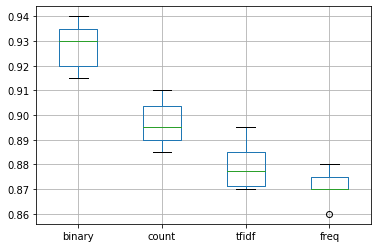

In [57]:
import matplotlib.pyplot as plt
# plot results
results.boxplot()
plt.show()

In [58]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
    tokens = clean_doc(review)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='binary')
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'


In [59]:
# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))
# test negative text
text = 'This is a bad movie. frustrating, disgusting'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [Best movie ever! It was great, I recommend it.]
Sentiment: POSITIVE (60.418%)
Review: [This is a bad movie. frustrating, disgusting]
Sentiment: NEGATIVE (65.636%)


## Extensions
This section lists some extensions if you are looking to get more out of this tutorial.
+ Manage Vocabulary. Explore using a larger or smaller vocabulary. Perhaps you can
get better performance with a smaller set of words.
+ Tune the Network Topology. Explore alternate network topologies such as deeper or
wider networks. Perhaps you can get better performance with a more suited network.
+ Use Regularization. Explore the use of regularization techniques, such as dropout.
Perhaps you can delay the convergence of the model and achieve better test set performance.
+ More Data Cleaning. Explore more or less cleaning of the review text and see how it
impacts the model skill.
+ Training Diagnostics. Use the test dataset as a validation dataset during training and
create plots of train and test loss. Use these diagnostics to tune the batch size and number
of training epochs.
+ Trigger Words. Explore whether there are specific words in reviews that are highly
predictive of the sentiment.
+ Use Bigrams. Prepare the model to score bigrams of words and evaluate the performance
under different scoring schemes.
+ Truncated Reviews. Explore how using a truncated version of the movie reviews results
impacts model skill, try truncating the start, end and middle of reviews.
+ Ensemble Models. Create models with different word scoring schemes and see if using
ensembles of the models results in improves to model skill.
+ Real Reviews. Train a final model on all data and evaluate the model on real movie
reviews taken from the internet.

In [32]:
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='tfidf')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='tfidf')
print(Xtrain.shape, Xtest.shape)

(1800, 14781) (200, 14781)


In [37]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200)
# transformed_x_train = tfidf_vec.fit_transform(x_train)
# transformed_x_test = tfidf_vec.transform(x_test)

print('TF-IDF output shape:', Xtrain.shape)
x_train_svd = svd.fit_transform(Xtrain)
x_test_svd = svd.transform(Xtest)

TF-IDF output shape: (1800, 14781)


In [38]:
x_train_svd = svd.fit_transform(Xtrain)
x_test_svd = svd.transform(Xtest)
print('LSA output shape:', x_train_svd.shape)

LSA output shape: (1800, 200)


In [39]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Sum of explained variance ratio: %d%%" % (int(explained_variance * 100)))

Sum of explained variance ratio: 29%


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

lr_model = LogisticRegression(solver='newton-cg',n_jobs=-1)
lr_model.fit(x_train_svd, ytrain)

cv = KFold(n_splits=5, shuffle=True)
    
scores = cross_val_score(lr_model, x_test_svd, ytest, cv=cv, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.8200 (+/- 0.0735)


In [48]:
# define network
n_words = x_train_svd.shape[1]
model = define_model(n_words)
# fit network
model.fit(x_train_svd, ytrain, epochs=10, verbose=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 10,101
Trainable params: 10,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 - 0s - loss: 0.9603 - accuracy: 0.5917
Epoch 2/10
 - 0s - loss: 0.4130 - accuracy: 0.8189
Epoch 3/10
 - 0s - loss: 0.3148 - accuracy: 0.8683
Epoch 4/10
 - 0s - loss: 0.2699 - accuracy: 0.8839
Epoch 5/10
 - 0s - loss: 0.2393 - accuracy: 0.8972
Epoch 6/10
 - 0s - loss: 0.2141 - accuracy: 0.9167
Epoch 7/10
 - 0s - loss: 0.1961 - accuracy: 0.9261
Epoch 8/10
 - 0s - loss: 0.1781 - accuracy: 0.9339
Epoch 9/10
 - 0s - loss: 0.1630 - accuracy: 0.9428
Epoch 10/10
 - 0s - loss: 0.1480 - accuracy: 0.9494


In [49]:
# evaluate
loss, acc = model.evaluate(x_test_svd, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))


Test Accuracy: 88.499999
